# Coursera Data Science Capstone Project

## 1. Introduction
Every day, about 3,700 people die in road traffic worldwide. Road traffic accidents are an increasing problem even in times of modern vehicle technology and well-developed infrastructure. According to the World Health Organization (WHO), 1.35 million people die in traffic accidents every year. According to the Federal Statistical Office, the causes of traffic accidents involving personal injury in Germany are:
- _Driver mistakes_
- _Road conditions, weather influences, obstacles_
- _Technical defects_
- _Incorrect pedestrian behavior_

This information can probably be transferred to other countries

#### Stakeholders
- _Trafic participants_
- _Responsible cities and road planners_

## 2. Data
The dataset used is based on a document called 'Collisions—All Years' from the organisation 'SDOT Traffic Management Division, Traffic Records Group'. It includes all types of collisions counted by the Seatle Police Department and Traffic records in the city of Seatle, WA in the timeframe beginning 2004 until present. The document is weekly updated. The project purpose is to analyze and predict the severity of an accident based on some particular features as follows:

- __INATTENTIONIND__ Whether or not collision was due to inattention. (Y/N)
- __UNDERINFL__ Whether or not a driver involved was under the influence of drugs or alcohol.
- __WEATHER__ A description of the weather conditions during the time of the collision.
- __ROADCOND__ The condition of the road during the collision.
- __LIGHTCOND__ The light conditions during the collision.
- __SPEEDING__ Whether or not speeding was a factor in the collision. (Y/N)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#from sklearn.metrics import jaccard_similarity_score

## 3. Data Cleaning

At the time, when this study was prepared the data consists of 194673 entries (counts of collosions). Each collosion was closer described in categories shown in the 37 collumns of the dataset. 
The number of usable entries in the columns of the datasets varies significantly. For this reason, a data cleaning was firstly done on the set of data. Missing or not usable entries were deleted, ohters were transformed or recoded. During the data cleaning the following steps were performed:

- _Data were imported_
- _Questions marks were replaced by NaN_
- _Changing severity code from 1=Property Damage Only and 2=Physical Injury to 0=Property Damage Only and 1=Physical Injury_

The amount of data for the analysed categories can then be plotted.

In [2]:
# Import Data
df = pd.read_csv('Data-Collisions.csv', index_col=0)
df.head(10)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 2 to 1
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               189339 non-null  float64
 1   Y               189339 non-null  float64
 2   OBJECTID        194673 non-null  int64  
 3   INCKEY          194673 non-null  int64  
 4   COLDETKEY       194673 non-null  int64  
 5   REPORTNO        194673 non-null  object 
 6   STATUS          194673 non-null  object 
 7   ADDRTYPE        192747 non-null  object 
 8   INTKEY          65070 non-null   float64
 9   LOCATION        191996 non-null  object 
 10  EXCEPTRSNCODE   84811 non-null   object 
 11  EXCEPTRSNDESC   5638 non-null    object 
 12  SEVERITYCODE.1  194673 non-null  int64  
 13  SEVERITYDESC    194673 non-null  object 
 14  COLLISIONTYPE   189769 non-null  object 
 15  PERSONCOUNT     194673 non-null  int64  
 16  PEDCOUNT        194673 non-null  int64  
 17  PEDCYLCOUNT    

In [4]:
df['ROADCOND'].describe()

count     189661
unique         9
top          Dry
freq      124510
Name: ROADCOND, dtype: object

Identify missing values
Convert "?" to NaN

In [5]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Evaluating for Missing Data
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
.isnull()
.notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [6]:
missing_data = df.isnull()
missing_data.head(5)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: P

In [8]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


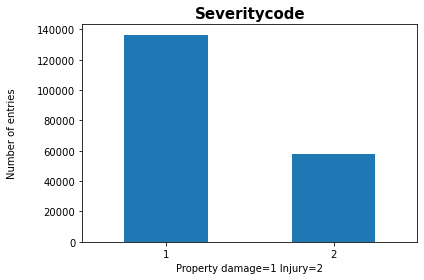

In [9]:
df['SEVERITYCODE.1'].value_counts().to_frame()
df['SEVERITYCODE.1'].value_counts().plot(kind='bar')
plt.title('Severitycode', fontsize=15, fontweight='bold')
plt.ylabel("Number of entries",fontsize=10,labelpad=20)
plt.xlabel("Property damage=1 Injury=2")
plt.xticks(rotation=360)
plt.show()

In [10]:
#Changing severity code 1=Property Damage Only and 2=Physical Injury to 0=Property Damage Only and 1=Physical Injury
severity_code = df['SEVERITYCODE.1'].values
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
df ["SEVERITYCODE.1"] = severity_code
severity_code


array([1, 0, 0, ..., 1, 1, 0])

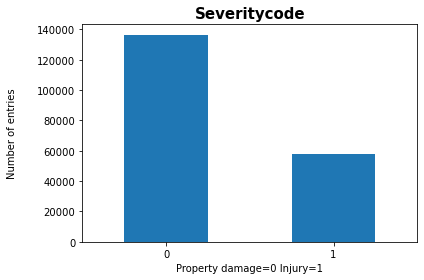

In [11]:
df['SEVERITYCODE.1'].value_counts().to_frame()
df['SEVERITYCODE.1'].value_counts().plot(kind='bar')
plt.title('Severitycode', fontsize=15, fontweight='bold')
plt.ylabel("Number of entries",fontsize=10,labelpad=20)
plt.xlabel("Property damage=0 Injury=1")
plt.xticks(rotation=360)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

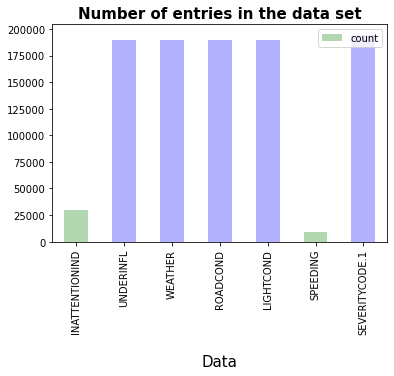

In [12]:
# Some Statistics
statis= df.describe(include="all")
#Plotting number of following variables
statis_plot=statis[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE.1"]]
statis_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
statis_plot=statis_plot.transpose()

color_yo=['green','blue','blue','blue','blue','green','blue']
statis_plot.plot(kind='bar',alpha=0.30,color=[color_yo])
plt.title('Number of entries in the data set', fontsize=15, fontweight='bold')
plt.xlabel("Data",fontsize=15,labelpad=20, rotation=0)
plt.xlabel(rotation=90)
plt.ylabel("Number of entries",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

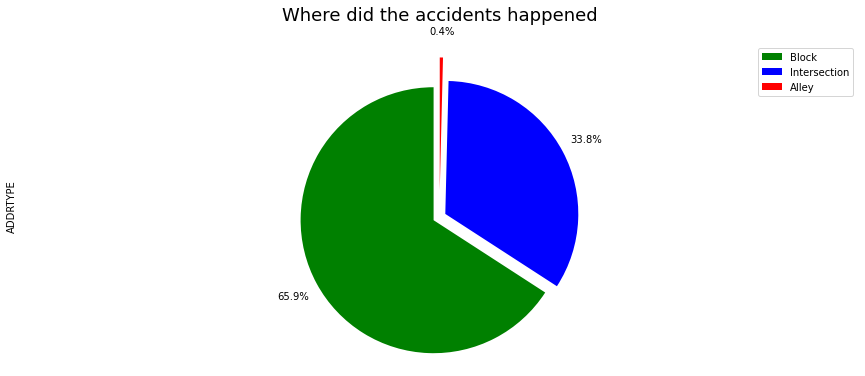

In [13]:
# Where did the accident happened
explode_list = [0.05, 0.05, 0.2]
color_list=['green','blue','red']
addtype=df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=None,
            labels=None,
            pctdistance=1.2,
            colors=color_list,
            explode=explode_list)


plt.title('Where did the accidents happened', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='upper right')

plt.show()

## 4. Data Preparation
The data preparation section constists of:
- _Feature Selection_
- _Recoding to numeric values_
- _Replace Unknown or NaN to statistical representative values_
- _Convert data types to integer_

### Feature Selection
The target variable for this analysis was set as severity code, which should be predicted by the following varialbes:
- __INATTENTIONIND__ Whether or not collision was due to inattention. (Y/N)
- __UNDERINFL__ Whether or not a driver involved was under the influence of drugs or alcohol.
- __WEATHER__ A description of the weather conditions during the time of the collision.
- __ROADCOND__ The condition of the road during the collision.
- __LIGHTCOND__ The light conditions during the collision.
- __SPEEDING__ Whether or not speeding was a factor in the collision. (Y/N)

### Recoding to numeric values
Most of the varialbes were described as object in string format. To apply Machine Learning algorithm these variables were coded as nurmeric values in the following way:
- _Coding key for INATTENTIONIND (0 = No, 1 = Yes)_
- _Coding key for UNDERINFL under influence (0 = No, 1 = Yes)_
- _Coding key for SPEEDING (0 = No, 1 = Yes)_
- _Coding key for LIGHTCOND Light Conditions(0 = Light, 1 = Medium, 2 = Dark)_
- _Coding key for WEATHER(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow_
- _Coding key for ROADCOND Road Conditions(0 = Dry, 1 = Muddy, 2 = Wet)_

Rows without values were deleted.

### Replace Unknown or NaN to statistical representative values
Unknown or NaN values were handeled as follows:

- _Missing 'WEATHER' values were replaced by the most frequent which is 0_
- _Missing 'lightcond' values were replaced by the most frequent which is 0_
- _Missing 'roadcond' values were replaced by the most frequent which is 0_

### Finally all datatypes were converted to integer.

In [14]:
# Proof if the IncKey have unqiue numbers
df['INCKEY'].nunique()

# Coding key for INATTENTIONIND (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Coding key for UNDERINFL under influence (0 = No, 1 = Yes)
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

# Coding key for SPEEDING (0 = No, 1 = Yes)
df["SPEEDING"].replace("Y", 1, inplace=True)
df["SPEEDING"].replace(np.nan, 0, inplace=True)

# Coding key for LIGHTCOND Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

# Coding key for WEATHER(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

# Coding key for ROADCOND Road Conditions(0 = Dry, 1 = Muddy, 2 = Wet)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)
df.head(10)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,2,0,NaN,NaN,0.0,10,Entering at angle,0,0,N
1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,2,1,NaN,6354039.0,0.0,11,From same direction - both going straight - bo...,0,0,N
1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,0,0,NaN,4323031.0,0.0,32,One parked--one moving,0,0,N
1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,0,0,NaN,NaN,0.0,23,From same direction - all others,0,0,N
2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,2,0,NaN,4028032.0,0.0,10,Entering at angle,0,0,N
1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,...,0,0,NaN,NaN,0.0,10,Entering at angle,0,0,N
1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,...,2,0,NaN,8344002.0,0.0,10,Entering at angle,0,0,N
2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,...,0,0,NaN,NaN,0.0,5,Vehicle Strikes Pedalcyclist,6855,0,N
1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,...,0,0,NaN,6166014.0,0.0,32,One parked--one moving,0,0,N


In [15]:
# Preparation of the dataframe for ML algorithm
selected_columns=df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE.1"]]
feature_df=selected_columns.copy()
# Delete rows without values
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

In [16]:
feature_df.head(20)

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE.1
SEVERITYCODE,,,,,,,,,,
2,-122.323148,47.703140,1307,0.0,0,1,2,0,0.0,1
1,-122.347294,47.647172,52200,0.0,0,3,2,1,0.0,0
1,-122.334540,47.607871,26700,0.0,0,1,0,0,0.0,0
1,-122.334803,47.604803,1144,0.0,0,0,0,0,0.0,0
2,-122.306426,47.545739,17700,0.0,0,3,2,0,0.0,1
1,-122.387598,47.690575,320840,0.0,0,0,0,0,0.0,0
1,-122.338485,47.618534,83300,0.0,0,3,2,0,0.0,0
2,-122.320780,47.614076,330897,0.0,0,0,0,0,0.0,1
1,-122.335930,47.611904,63400,0.0,0,0,0,0,0.0,0


Evaluating for Missing Data
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

In [17]:
missing_data = feature_df.isnull()
missing_data.head(15)

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE.1
SEVERITYCODE,,,,,,,,,,
2,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False


Count missing values in each column Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [18]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

X
False    184167
Name: X, dtype: int64

Y
False    184167
Name: Y, dtype: int64

INCKEY
False    184167
Name: INCKEY, dtype: int64

INATTENTIONIND
False    184167
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    184167
Name: UNDERINFL, dtype: int64

WEATHER
False    184167
Name: WEATHER, dtype: int64

ROADCOND
False    184167
Name: ROADCOND, dtype: int64

LIGHTCOND
False    184167
Name: LIGHTCOND, dtype: int64

SPEEDING
False    184167
Name: SPEEDING, dtype: int64

SEVERITYCODE.1
False    184167
Name: SEVERITYCODE.1, dtype: int64



In [19]:
# replace "Unknown" to NaN
feature_df.replace("Unknown", np.nan, inplace = True)
feature_df.head(20)

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE.1
SEVERITYCODE,,,,,,,,,,
2,-122.323148,47.703140,1307,0.0,0,1.0,2.0,0.0,0.0,1
1,-122.347294,47.647172,52200,0.0,0,3.0,2.0,1.0,0.0,0
1,-122.334540,47.607871,26700,0.0,0,1.0,0.0,0.0,0.0,0
1,-122.334803,47.604803,1144,0.0,0,0.0,0.0,0.0,0.0,0
2,-122.306426,47.545739,17700,0.0,0,3.0,2.0,0.0,0.0,1
1,-122.387598,47.690575,320840,0.0,0,0.0,0.0,0.0,0.0,0
1,-122.338485,47.618534,83300,0.0,0,3.0,2.0,0.0,0.0,0
2,-122.320780,47.614076,330897,0.0,0,0.0,0.0,0.0,0.0,1
1,-122.335930,47.611904,63400,0.0,0,0.0,0.0,0.0,0.0,0


In [20]:
# To see which values are present in severity code:
feature_df['SEVERITYCODE.1'].value_counts()

0    128154
1     56013
Name: SEVERITYCODE.1, dtype: int64

In [21]:
# To see which values are present in weather:
feature_df['WEATHER'].value_counts()

0.0    108833
3.0     32987
1.0     27110
2.0       626
Name: WEATHER, dtype: int64

In [22]:
#replace the missing 'WEATHER' values by the most frequent which is 0
feature_df["WEATHER"].replace(np.nan, 0, inplace=True)

In [23]:
# To see which values are present in lightcond:
feature_df['LIGHTCOND'].value_counts()

0.0    113522
1.0     55435
2.0      2606
Name: LIGHTCOND, dtype: int64

In [24]:
#replace the missing 'lightcond' values by the most frequent which is 0
feature_df["LIGHTCOND"].replace(np.nan, 0, inplace=True)
feature_df.head(20)

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE.1
SEVERITYCODE,,,,,,,,,,
2,-122.323148,47.703140,1307,0.0,0,1.0,2.0,0.0,0.0,1
1,-122.347294,47.647172,52200,0.0,0,3.0,2.0,1.0,0.0,0
1,-122.334540,47.607871,26700,0.0,0,1.0,0.0,0.0,0.0,0
1,-122.334803,47.604803,1144,0.0,0,0.0,0.0,0.0,0.0,0
2,-122.306426,47.545739,17700,0.0,0,3.0,2.0,0.0,0.0,1
1,-122.387598,47.690575,320840,0.0,0,0.0,0.0,0.0,0.0,0
1,-122.338485,47.618534,83300,0.0,0,3.0,2.0,0.0,0.0,0
2,-122.320780,47.614076,330897,0.0,0,0.0,0.0,0.0,0.0,1
1,-122.335930,47.611904,63400,0.0,0,0.0,0.0,0.0,0.0,0


In [25]:
# To see which values are present in roadcond:
feature_df['ROADCOND'].value_counts()

0.0    121871
2.0     47338
1.0      1047
Name: ROADCOND, dtype: int64

In [26]:
#replace the missing 'roadcond' values by the most frequent which is 0
feature_df["ROADCOND"].replace(np.nan, 0, inplace=True)
feature_df.head(20)

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE.1
SEVERITYCODE,,,,,,,,,,
2,-122.323148,47.703140,1307,0.0,0,1.0,2.0,0.0,0.0,1
1,-122.347294,47.647172,52200,0.0,0,3.0,2.0,1.0,0.0,0
1,-122.334540,47.607871,26700,0.0,0,1.0,0.0,0.0,0.0,0
1,-122.334803,47.604803,1144,0.0,0,0.0,0.0,0.0,0.0,0
2,-122.306426,47.545739,17700,0.0,0,3.0,2.0,0.0,0.0,1
1,-122.387598,47.690575,320840,0.0,0,0.0,0.0,0.0,0.0,0
1,-122.338485,47.618534,83300,0.0,0,3.0,2.0,0.0,0.0,0
2,-122.320780,47.614076,330897,0.0,0,0.0,0.0,0.0,0.0,1
1,-122.335930,47.611904,63400,0.0,0,0.0,0.0,0.0,0.0,0


list the data types for each column

In [27]:
# change data type from object to int
feature_df[["X"]] = feature_df[["X"]].astype("int")
feature_df[["Y"]] = feature_df[["Y"]].astype("int")
feature_df[["INATTENTIONIND"]] = feature_df[["INATTENTIONIND"]].astype("int")
feature_df[["UNDERINFL"]] = feature_df[["UNDERINFL"]].astype("int")
feature_df[["WEATHER"]] = feature_df[["WEATHER"]].astype("int")
feature_df[["ROADCOND"]] = feature_df[["ROADCOND"]].astype("int")
feature_df[["LIGHTCOND"]] = feature_df[["LIGHTCOND"]].astype("int")
feature_df[["SPEEDING"]] = feature_df[["SPEEDING"]].astype("int")
feature_df.dtypes

X                 int64
Y                 int64
INCKEY            int64
INATTENTIONIND    int64
UNDERINFL         int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
SPEEDING          int64
SEVERITYCODE.1    int64
dtype: object

In [28]:
feature_df.head(20)
feature_df.tail(30)

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE.1
SEVERITYCODE,,,,,,,,,,
1,-122,47,308716,1,0,3,2,0,0,0
2,-122,47,307337,0,0,1,2,2,0,1
1,-122,47,307864,0,0,0,0,0,0,0
1,-122,47,307995,0,0,0,0,0,0,0
1,-122,47,307577,0,0,0,0,1,0,0
1,-122,47,312117,0,0,0,0,1,0,0
2,-122,47,307692,0,0,0,0,1,0,1
2,-122,47,308575,1,0,3,2,1,0,1
1,-122,47,307792,0,1,3,2,1,0,0


X as the Feature Matrix (data of my_data)
y as the response vector (target)

In [29]:
# To see which values are present in severity code:
feature_df['SEVERITYCODE.1'].value_counts()

0    128154
1     56013
Name: SEVERITYCODE.1, dtype: int64

In [30]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE.1"]].values

## 5. Methodology 

The Methodology used in this project consists of the following steps:

- __Data understanding and Data cleaning__

In this step the content of the given data is examined, and first considerations were made, how the data analysis could look like. Stakeholders are identified who could benefit from the analysis. Further, the data are cleaned up to make it easier to use Python algorithms later. A selection of the variables necessary for the analysis is made. 

- __Data preparation__

In this section the features were defined which are used to predict the severity of a potentiall collosion. Objecttype features were recoded to numeric values (integer) to apply Machine Learing algorithm on them. Unknown values were either deleted or assesed by representative values. The following features are selected:

- _INATTENTIONIND_ Whether or not collision was due to inattention. (Y/N)
- _UNDERINFL_ Whether or not a driver involved was under the influence of drugs or alcohol.
- _WEATHER_ A description of the weather conditions during the time of the collision.
- _ROADCOND_ The condition of the road during the collision.
- _LIGHTCOND_ The light conditions during the collision.
- _SPEEDING_ Whether or not speeding was a factor in the collision. (Y/N)

They were recoded as follows:

- _Coding key for INATTENTIONIND (0 = No, 1 = Yes)_
- _Coding key for UNDERINFL under influence (0 = No, 1 = Yes)_
- _Coding key for SPEEDING (0 = No, 1 = Yes)_
- _Coding key for LIGHTCOND Light Conditions(0 = Light, 1 = Medium, 2 = Dark)_
- _Coding key for WEATHER(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow_
- _Coding key for ROADCOND Road Conditions(0 = Dry, 1 = Muddy, 2 = Wet)_

Unknown or NaN values were handeled as follows:

- _Missing 'WEATHER' values were replaced by the most frequent which is 0_
- _Missing 'lightcond' values were replaced by the most frequent which is 0_
- _Missing 'roadcond' values were replaced by the most frequent which is 0_


- __Machine Learning Section__

The following ML algorithm were applied on the prepared features. The aim of the task was to develop a method which can predict the severity (injury or property damage) of a collosion when the data according the feature selection are known. 

- _Decision Tree_
- _K nearest Neighbor (KNN)_
- _Logistic Regression_

To achieve this, the data were splited into a train and test set using the train_test_split from sklearn.cross_validation. 


Train_test_split returns 4 different parameters. They are named:

X_trainset, X_testset, y_trainset, y_testset 

The train_test_split will need the parameters:

X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

The performance and precision of the applied ML functions, are visualized in a confusion matrix. In addition the F1 score were calculated to evaluate the accuracy of the analysis. These scores will help compare the ML algorithms.

## 6. Results

### Decision Tree Analysis
After sufficient training and testsets were defined, the Decision Tree Analysis was performed using the Scikit learn library. 
First an instance of the DecisionTreeClassifier called DT was created. Entropy was taken as criterion and the max depth was 6. Predictions were then made on the testing dataset and store it into a variable called yhatDT.

The performance and precision of the DT functions, were visualized in a confusion matrix. In addition the F1 score were calculated to evaluate the accuracy of the analysis. In addition a classification report were printed. These scores will help compare the ML algorithms.

We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

In [31]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. They are named:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that the same splits are obtained.

In [32]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


First an instance of the DecisionTreeClassifier called DT is created.
Inside of the classifier, specify criterion="entropy" so the information gain of each nod can be seen.


In [33]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    <b>Predictions</b> are made on the testing dataset and store it into a variable called <b>yhatDT</b>.
</div>

In [34]:
#Make Prediction:
yhatDT = DT.predict(X_testset)

In [35]:
# print out yhatDT and y_testset to visually compare the prediction to the actual values.
print (yhatDT [0:5])
print (y_testset [0:5])

[0 0 0 0 0]
[[0]
 [0]
 [1]
 [0]
 [1]]


In [36]:
#Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_testset))

        #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_testset.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy score for Decision Tree =  0.6987384843713236
Confusion Matrix - Decision Tree
Predicted      0    1    All
True                        
0          38542   55  38597
1          16590   64  16654
All        55132  119  55251


Confusion matrix, without normalization
[[   64 16590]
 [   55 38542]]
Avg F1-score for Decision Tree is: 0.58


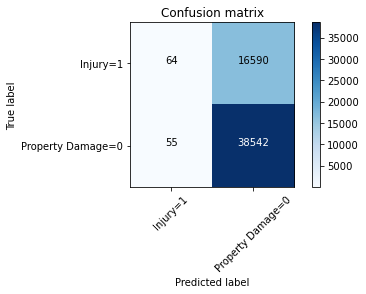

In [37]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#    """
#   This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`.
#    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_testset, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

#cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
#np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
DTF1=f1_score(y_testset, yhatDT, average='weighted') 
print("Avg F1-score for Decision Tree is: %.2f" % DTF1)

In [38]:
yhatDT.size
#y_testset.size

55251

In [39]:
print (classification_report(y_testset, yhatDT))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     38597
           1       0.54      0.00      0.01     16654

    accuracy                           0.70     55251
   macro avg       0.62      0.50      0.42     55251
weighted avg       0.65      0.70      0.58     55251



### K Nearest Neighbor (KNN) Analysis

The second ML approach applied on the training and test datatset was the K Nearest Neighbor (KNN) algorithm. The functions were also taken from the Scikit Learn library.

First the best k was evaluated by calculating the accuracy of k between 1 and 10. 

As for the DT study, the performance and precision of the KNN function, was visualized in a confusion matrix. In addition the F1 score were calculated to evaluate the accuracy of the analysis. In addition a classification report were printed. 
 


In [40]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trainset.shape,  y_trainset.shape)
print ('Test set:', X_testset.shape,  y_testset.shape)
y=np.ravel(y)
y[0:5]

Train set: (147333, 6) (147333, 1)
Test set: (36834, 6) (36834, 1)


array([1, 0, 0, 0, 1])

In [41]:
from sklearn.neighbors import KNeighborsClassifier
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh
yhatKNN = neigh.predict(X_testset)
yhatKNN[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhatKNN))

<ipython-input-41-014f238a7690>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)


Train set Accuracy:  0.691963103988923
Test set Accuracy:  0.694467068469349


Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhatKNN=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhatKNN)

    
    std_acc[n-1]=np.std(yhatKNN==y_testset)/np.sqrt(yhatKNN.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [45]:
#Check Accuracy
print('Accuracy score for K-nearest neighbors = ', accuracy_score(yhatKNN, y_testset))

        #Visualization
print('Confusion Matrix - KNN')
print(pd.crosstab(y_testset.ravel(), yhatKNN.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Accuracy score for K-nearest neighbors =  0.6581690829125265
Confusion Matrix - KNN
Predicted      0     1    All
True                         
0          22728  2965  25693
1           9626  1515  11141
All        32354  4480  36834


Confusion matrix, without normalization
[[ 1515  9626]
 [ 2965 22728]]
Avg F1-score for KNN is: 0.60


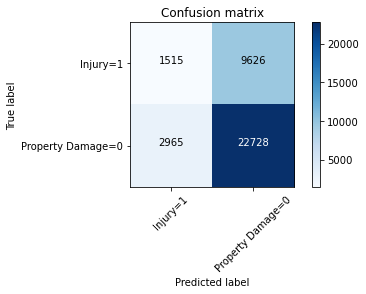

In [46]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#    """
#   This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`.
#    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_testset, yhatKNN, labels=[1,0])
np.set_printoptions(precision=2)

#cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
#np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
KNNF1=f1_score(y_testset, yhatKNN, average='weighted') 
print("Avg F1-score for KNN is: %.2f" % KNNF1)

In [47]:
y_testset.size
yhatKNN.size

36834

In [48]:
print (classification_report(y_testset, yhatKNN))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78     25693
           1       0.34      0.14      0.19     11141

    accuracy                           0.66     36834
   macro avg       0.52      0.51      0.49     36834
weighted avg       0.59      0.66      0.60     36834



Based on the count of each section,the precision and recall of each label can be calculated:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
Precision and recall of each class can be calculated.

__F1 score:__
Now the F1 scores for each label based on the precision and recall of that label can be calculated. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, the average accuracy for this classifier is the average of the F1-score for both labels.

### Modeling: Logistic Regression

Finally the __LogisticRegression__ from Scikit-learn package was applied on the datasets. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. Here the liblinear solver was used and the C value was chosen as 0.01.

As in the studies before, the performance and precision of the Logistic Regression function, was visualized in a confusion matrix and using the F1 score. In addition a classification report were printed. 

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.01, solver='liblinear')

Prediction using the test set:

In [51]:
yhatLR = LR.predict(X_testset)
yhatLR

array([0, 0, 0, ..., 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [52]:
yhat_probLR = LR.predict_proba(X_testset)
yhat_probLR

array([[0.71, 0.29],
       [0.71, 0.29],
       [0.71, 0.29],
       ...,
       [0.74, 0.26],
       [0.71, 0.29],
       [0.69, 0.31]])

<h2 id="evaluation">Evaluation</h2>

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [53]:
#from sklearn.metrics import jaccard_similarity_score
#jaccard_similarity_score(y_testset, yhatLR)

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, yhatLR, labels=[1,0]))

[[    2 11139]
 [   12 25681]]


Confusion matrix, without normalization
[[    2 11139]
 [   12 25681]]
Avg F1-score for Logistic Regression is: 0.57


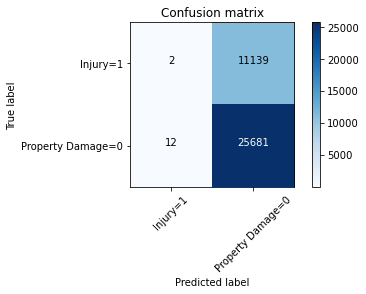

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')
# f1 Score
from sklearn.metrics import f1_score
LRF1=f1_score(y_testset, yhatLR, average='weighted') 
print("Avg F1-score for Logistic Regression is: %.2f" % LRF1)

In [56]:
print (classification_report(y_testset, yhatLR))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82     25693
           1       0.14      0.00      0.00     11141

    accuracy                           0.70     36834
   macro avg       0.42      0.50      0.41     36834
weighted avg       0.53      0.70      0.57     36834



### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [57]:
from sklearn.metrics import log_loss
log_loss(y_testset, yhat_probLR)

0.609952133056642

## 7. Discussion 
section where you discuss any observations you noted and any recommendations you can make based on the results.


## 8. Conclusion 
section where you conclude the report.